# HW3_zz1598
## Assignment 1
### Written by Ziman Zhou

### GENERATE 100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total) all with the *same population mean*. 
### Distributions: Normal, Poisson, Binomial, Chi-Squared, and Logistic.
#### For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well).

## Describe the behavior you see in the plots in terms of the law of large numbers.
#### PLOT the distributions of all sample means (together for all distributions). Mandatory: as a histogram. Optional: in any other way you think is convincing 
#### Extra Credit: FIT a gaussian to the distribution of means

## Questions!!!!!1. fit function...

In [94]:
from __future__ import print_function
import numpy as np
import pylab as pl
#import seaborn
from scipy.optimize import curve_fit, minimize
#from scipy import optimize
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'mean', 'size', 'std', 'var']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [95]:
#Create a dictionary with my selected distributions
#myd = {'gauss', 'poiss', 'binom', 'chisq', 'cauchy'}
myd = {}
mymean = 80
mysize = (2000 / (np.linspace(1,100, num=100))).astype(int)
print (mysize, mysize.shape)
print(len(mysize))

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20   20] (100,)
100


## Gaussion(Normal) Distribution

70
70


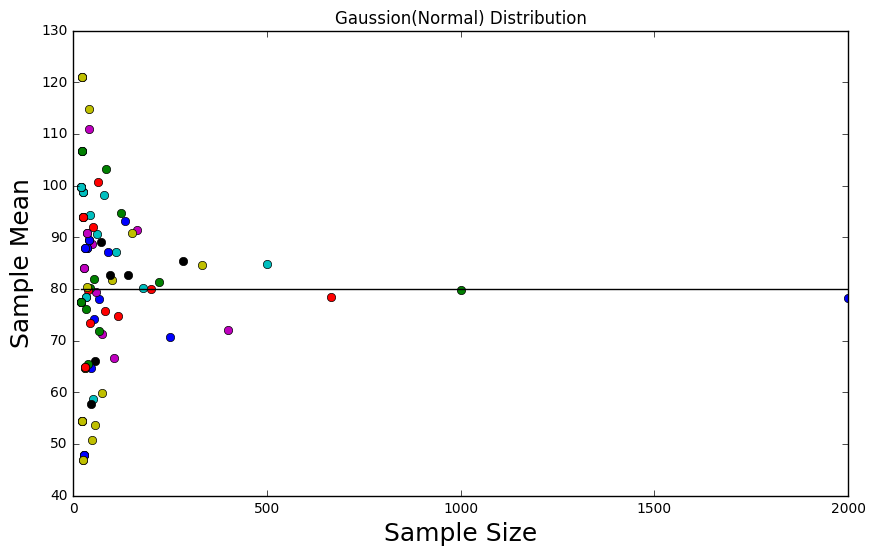

In [96]:
myd['gauss'] = {}
mean = mymean   #Normal Distribution: center = mean
std = 100

np.random.seed(22)
for n in mysize:
    myd['gauss'][n] = np.random.normal(mean, std, n )

myd['gauss']['means'] = {}
ax_gauss_mn = pl.figure(figsize(10,6)).add_subplot(111) 
#for nn in myd['gauss']:
    #if type(nn) != str:
for mn in mysize: #the n to get mean
    myd['gauss']['means'][mn] = myd['gauss'][mn].mean()
    # plot this mean
    ax_gauss_mn.plot(mn, myd['gauss']['means'][mn], 'o')
    ax_gauss_mn.set_title('Gaussion(Normal) Distribution')
    ax_gauss_mn.set_xlabel('Sample Size', fontsize=18)
    ax_gauss_mn.set_ylabel('Sample Mean', fontsize=18)
ax_gauss_mn.plot([min(mysize), max(mysize)], [mymean,mymean], 'k')

print (len(myd['gauss']))
print (len(myd['gauss'].values()))

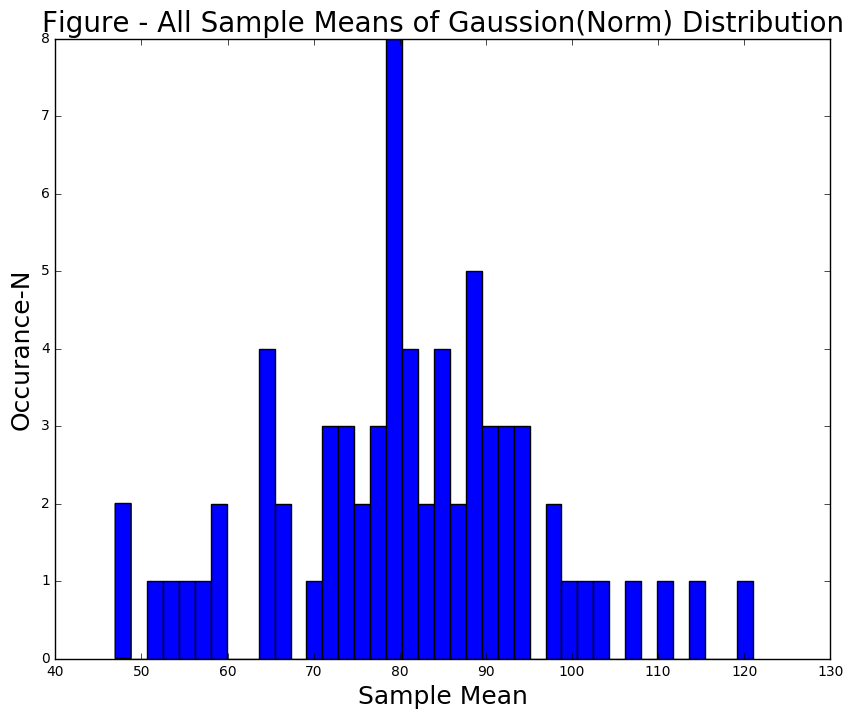

In [97]:
# Get all the means and plot a histogram to observe the occurance 
allmeans_gauss = list(myd['gauss']['means'].values())

pl.figure(figsize=(10,8)).add_subplot(111)
pl.hist(allmeans_gauss, bins=40)
pl.title('Figure - All Sample Means of Gaussion(Norm) Distribution', fontsize=20)
pl.xlabel('Sample Mean', fontsize=18)
pl.ylabel('Occurance-N', fontsize=18)

## Poisson Distribution

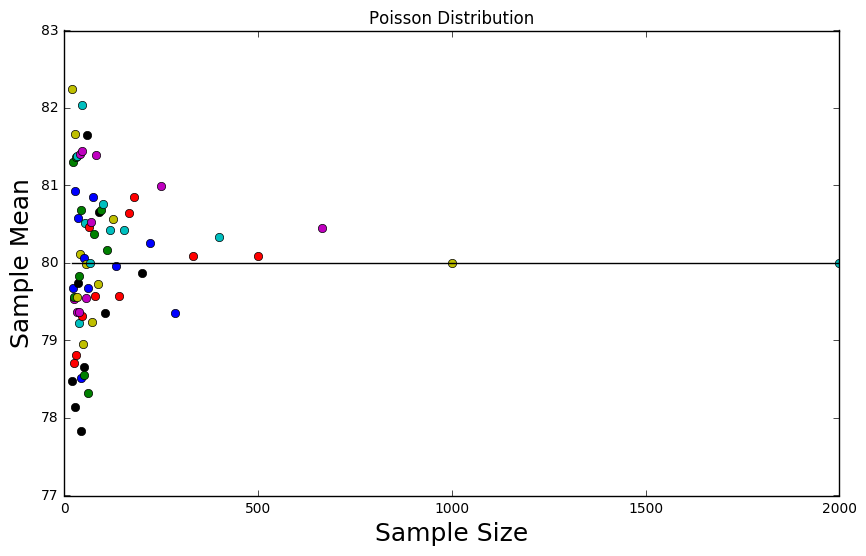

In [98]:
myd['poiss'] = {}
lam = mymean   #Normal Distribution: center = mean

np.random.seed(22)
for n in mysize:
    myd['poiss'][n] = np.random.poisson(lam, n )

myd['poiss']['means'] = {}
ax_poiss_mn = pl.figure(figsize(10,6)).add_subplot(111) 

for mn in myd['poiss']:
    if type(mn) != str:
        myd['poiss']['means'][mn] = myd['poiss'][mn].mean()
        # plot this mean
        ax_poiss_mn.plot(mn, myd['poiss']['means'][mn], 'o')
        ax_poiss_mn.set_title('Poisson Distribution')
        ax_poiss_mn.set_xlabel('Sample Size', fontsize=18)
        ax_poiss_mn.set_ylabel('Sample Mean', fontsize=18)
ax_poiss_mn.plot([min(mysize), max(mysize)], [mymean,mymean], 'k')

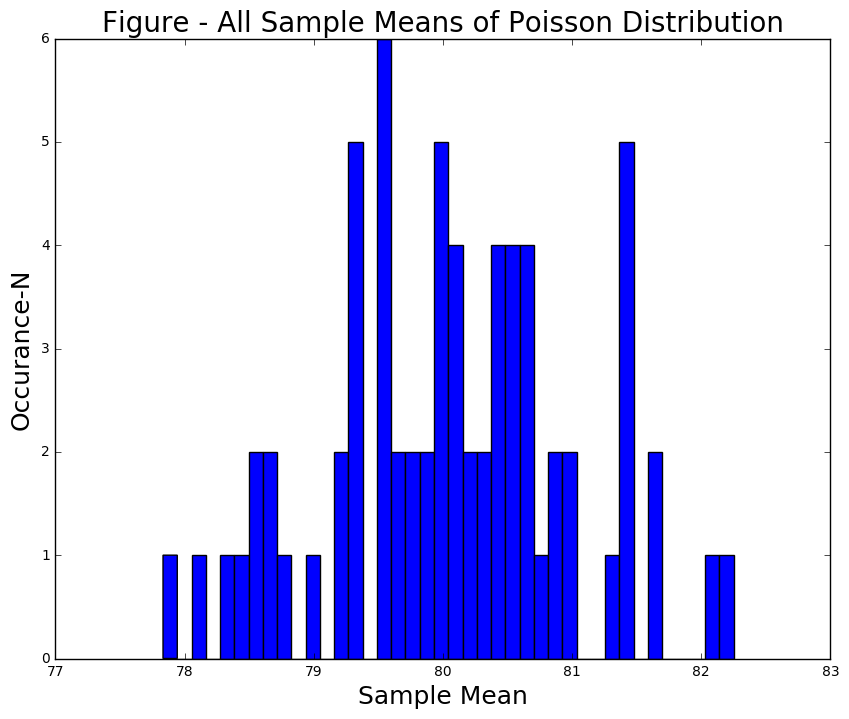

In [99]:
# Get all the means and plot a histogram to observe the occurance 
allmeans_poiss = list(myd['poiss']['means'].values())

pl.figure(figsize=(10,8)).add_subplot(111)
pl.hist(allmeans_poiss, bins=40)
pl.title('Figure - All Sample Means of Poisson Distribution', fontsize=20)
pl.xlabel('Sample Mean', fontsize=18)
pl.ylabel('Occurance-N', fontsize=18)

## Binomial Distribution

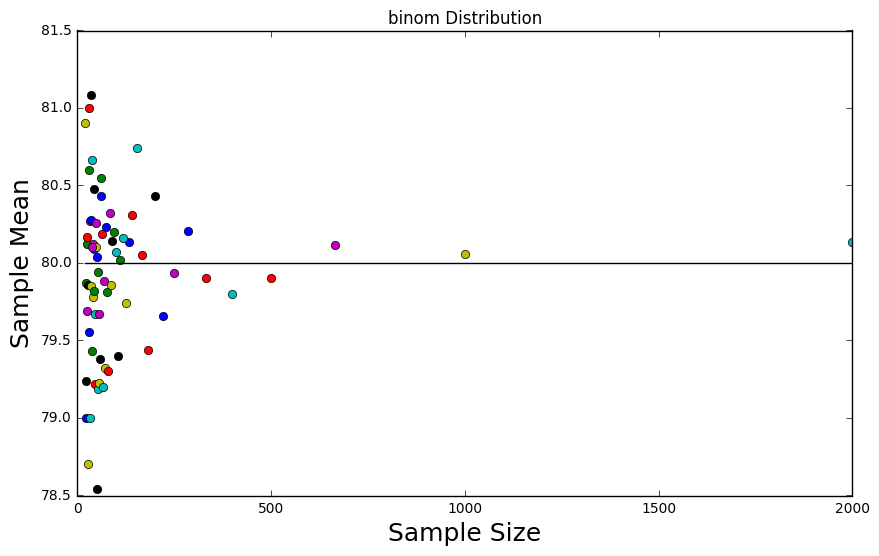

In [100]:
myd['binom'] = {}
n_trials = 100  #Binomial Distribution: mean = n * p
p = 0.8

np.random.seed(22)
for n in mysize:
    myd['binom'][n] = np.random.binomial(n_trials, p, n )

myd['binom']['means'] = {}
ax_binom_mn = pl.figure(figsize(10,6)).add_subplot(111) 

for mn in myd['binom']:
    if type(mn) != str:
        myd['binom']['means'][mn] = myd['binom'][mn].mean()
        # plot this mean
        ax_binom_mn.plot(mn, myd['binom']['means'][mn], 'o')
        ax_binom_mn.set_title('binom Distribution')
        ax_binom_mn.set_xlabel('Sample Size', fontsize=18)
        ax_binom_mn.set_ylabel('Sample Mean', fontsize=18)
ax_binom_mn.plot([min(mysize), max(mysize)], [mymean,mymean], 'k')

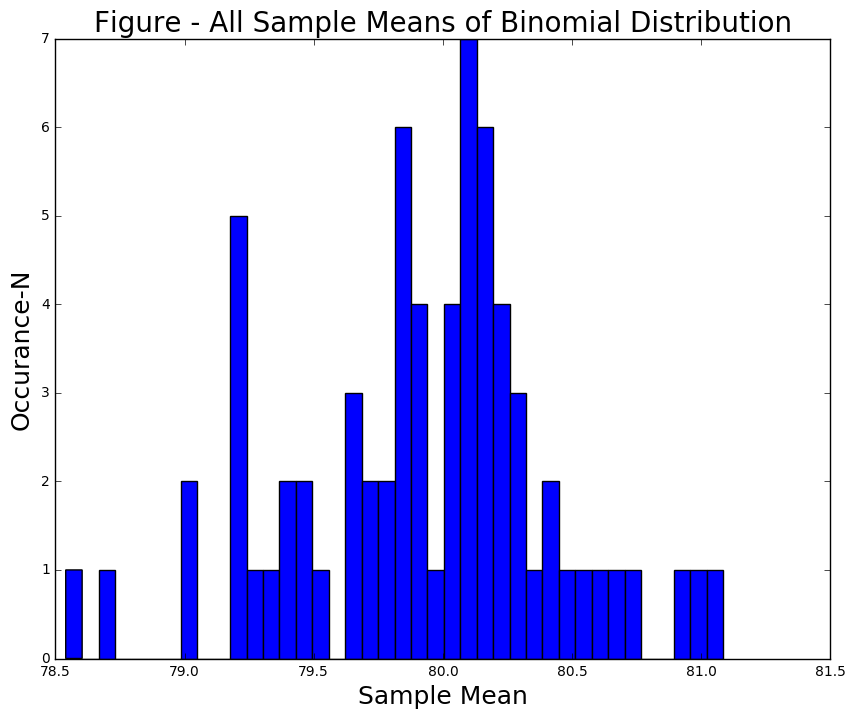

In [101]:
# Get all the means and plot a histogram to observe the occurance 
allmeans_binom = list(myd['binom']['means'].values())

pl.figure(figsize=(10,8)).add_subplot(111)
pl.hist(allmeans_binom, bins=40)
pl.title('Figure - All Sample Means of Binomial Distribution', fontsize=20)
pl.xlabel('Sample Mean', fontsize=18)
pl.ylabel('Occurance-N', fontsize=18)

## Chi-Squared Distribution

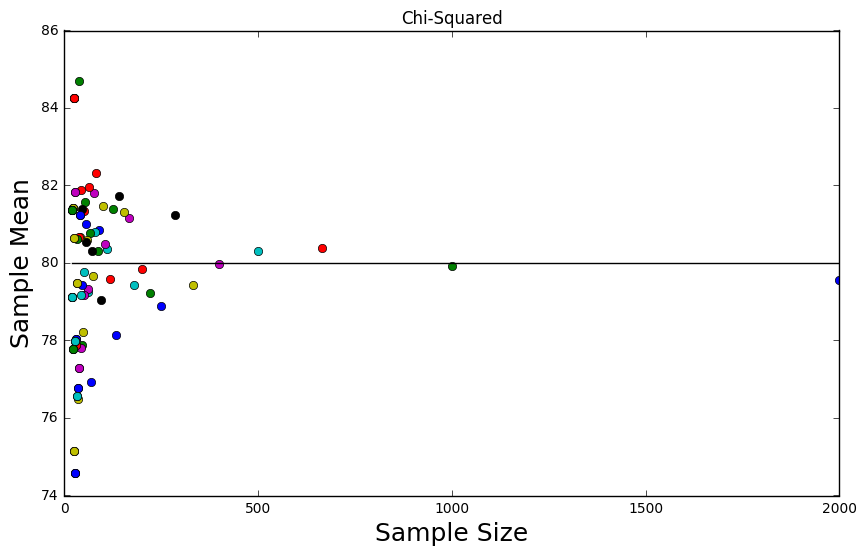

In [102]:
myd['chisq'] = {}
df = mymean   #chi-square: degree of freedom = mean
np.random.seed(22)
for n in mysize:
    myd['chisq'][n] = np.random.chisquare(df, size=n)

myd['chisq']['means'] = {}
ax_chisq_mn = pl.figure(figsize(10,6)).add_subplot(111) 
#for nn in myd['chisq']:
    #if type(nn) != str:
for mn in mysize: #the n to get mean
    myd['chisq']['means'][mn] = myd['chisq'][mn].mean()
    # plot this mean
    ax_chisq_mn.plot(mn, myd['chisq']['means'][mn], 'o')
    ax_chisq_mn.set_title('Chi-Squared')
    ax_chisq_mn.set_xlabel('Sample Size', fontsize=18)
    ax_chisq_mn.set_ylabel('Sample Mean', fontsize=18)
ax_chisq_mn.plot([min(mysize), max(mysize)], [mymean,mymean], 'k')


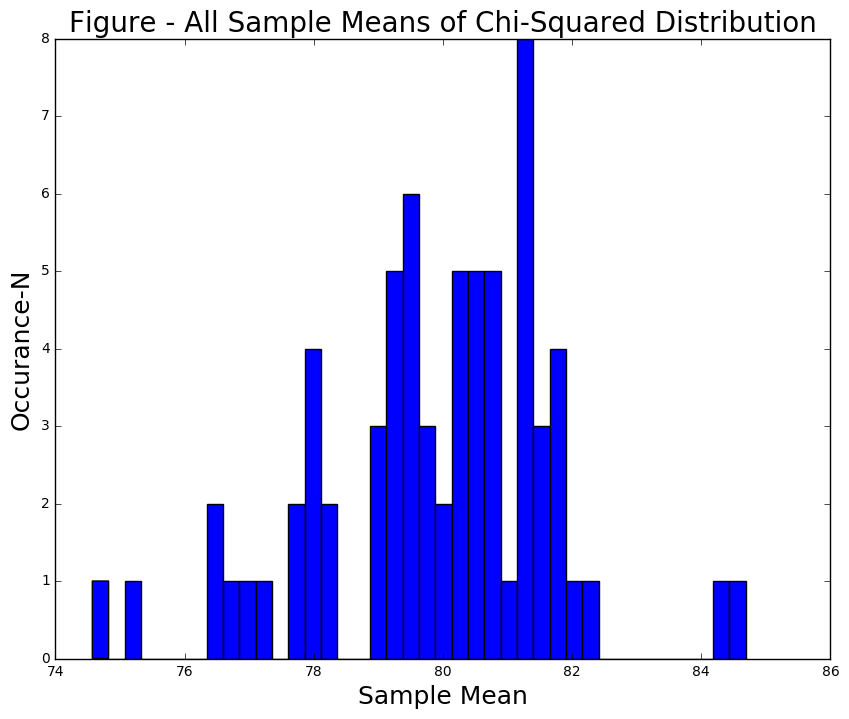

In [103]:
# Get all the means and plot a histogram to observe the occurance 
allmeans_chisq = list(myd['chisq']['means'].values())

pl.figure(figsize=(10,8)).add_subplot(111)
pl.hist(allmeans_chisq, bins=40)
pl.title('Figure - All Sample Means of Chi-Squared Distribution', fontsize=20)
pl.xlabel('Sample Mean', fontsize=18)
pl.ylabel('Occurance-N', fontsize=18)

## Logistic Distribution

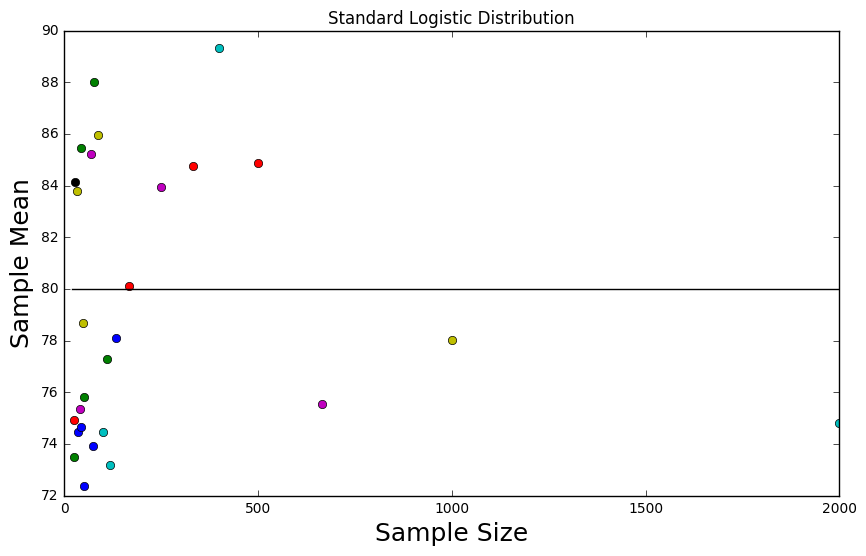

In [104]:
myd['logis'] = {}
mean = mymean
scale = 100

np.random.seed(22)
for n in mysize:
    myd['logis'][n] = np.random.logistic(mean,scale, n)

myd['logis']['means'] = {}
ax_logis_mn = pl.figure(figsize(10,6)).add_subplot(111) 

for mn in myd['logis']:
    if type(mn) != str:
        myd['logis']['means'][mn] = myd['logis'][mn].mean()
        # plot this mean
        ax_logis_mn.plot(mn, myd['logis']['means'][mn], 'o')
        ax_logis_mn.set_ylim(72, 90)
        ax_logis_mn.set_title('Standard Logistic Distribution')
        ax_logis_mn.set_xlabel('Sample Size', fontsize=18)
        ax_logis_mn.set_ylabel('Sample Mean', fontsize=18)
ax_logis_mn.plot([min(mysize), max(mysize)], [mymean,mymean], 'k')

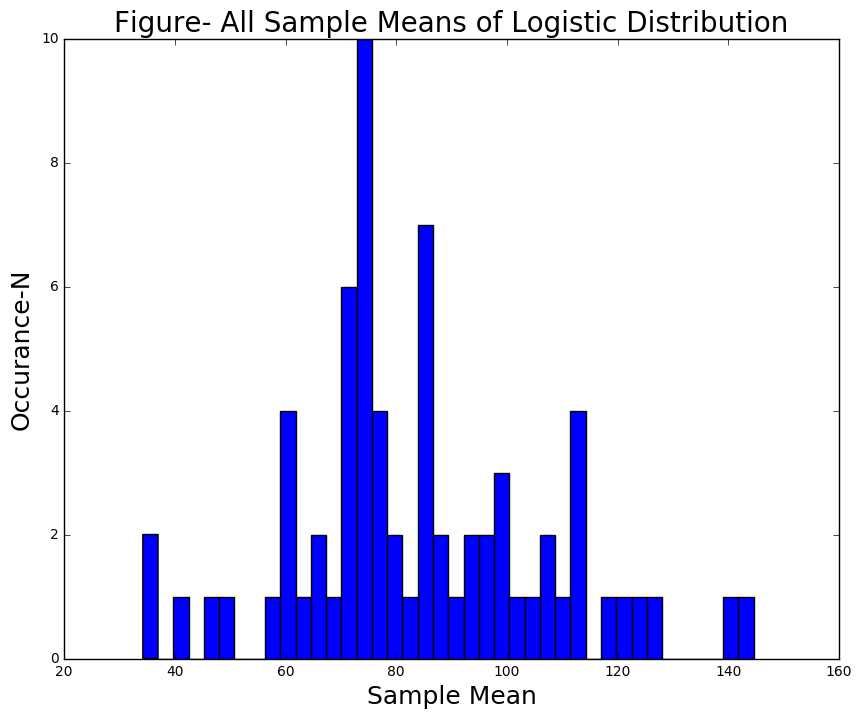

In [105]:
# Get all the means and plot a histogram to observe the occurance 
allmeans_logis = list(myd['logis']['means'].values())

pl.figure(figsize=(10,8)).add_subplot(111)
pl.hist(allmeans_logis, bins=40)
pl.title('Figure- All Sample Means of Logistic Distribution', fontsize=20)
pl.xlabel('Sample Mean', fontsize=18)
pl.ylabel('Occurance-N', fontsize=18)

## Standard Cauchy Distribution

In [106]:
'''
myd['cauchy'] = {}

np.random.seed(22)
for n in mysize:
    myd['cauchy'][n] = np.random.standard_cauchy(n) + mymean

myd['cauchy']['means'] = {}
ax_cauchy_mn = pl.figure(figsize(10,6)).add_subplot(111) 

for mn in myd['cauchy']:
    if type(mn) != str:
        myd['cauchy']['means'][mn] = myd['cauchy'][mn].mean()
        # plot this mean
        ax_cauchy_mn.plot(mn, myd['cauchy']['means'][mn], 'o')
        ax_cauchy_mn.set_ylim(72, 90)
        ax_cauchy_mn.set_title('Standard Cauchy Distribution')
        ax_cauchy_mn.set_xlabel('Sample Size', fontsize=18)
        ax_cauchy_mn.set_ylabel('Sample Mean', fontsize=18)
ax_cauchy_mn.plot([min(mysize), max(mysize)], [mymean,mymean], 'k')
'''

"\nmyd['cauchy'] = {}\n\nnp.random.seed(22)\nfor n in mysize:\n    myd['cauchy'][n] = np.random.standard_cauchy(n) + mymean\n\nmyd['cauchy']['means'] = {}\nax_cauchy_mn = pl.figure(figsize(10,6)).add_subplot(111) \n\nfor mn in myd['cauchy']:\n    if type(mn) != str:\n        myd['cauchy']['means'][mn] = myd['cauchy'][mn].mean()\n        # plot this mean\n        ax_cauchy_mn.plot(mn, myd['cauchy']['means'][mn], 'o')\n        ax_cauchy_mn.set_ylim(72, 90)\n        ax_cauchy_mn.set_title('Standard Cauchy Distribution')\n        ax_cauchy_mn.set_xlabel('Sample Size', fontsize=18)\n        ax_cauchy_mn.set_ylabel('Sample Mean', fontsize=18)\nax_cauchy_mn.plot([min(mysize), max(mysize)], [mymean,mymean], 'k')\n"

In [107]:
'''
# Get all the means and plot a histogram to observe the occurance 
allmeans_cauchy = list(myd['cauchy']['means'].values())

pl.figure(figsize=(10,8)).add_subplot(111)
pl.hist(allmeans_cauchy, bins=40)
pl.title('Figure- All Sample Means of Standard Cauchy Distribution', fontsize=20)
pl.xlabel('Sample Mean', fontsize=18)
pl.ylabel('Occurance-N', fontsize=18)
'''

"\n# Get all the means and plot a histogram to observe the occurance \nallmeans_cauchy = list(myd['cauchy']['means'].values())\n\npl.figure(figsize=(10,8)).add_subplot(111)\npl.hist(allmeans_cauchy, bins=40)\npl.title('Figure- All Sample Means of Standard Cauchy Distribution', fontsize=20)\npl.xlabel('Sample Mean', fontsize=18)\npl.ylabel('Occurance-N', fontsize=18)\n"

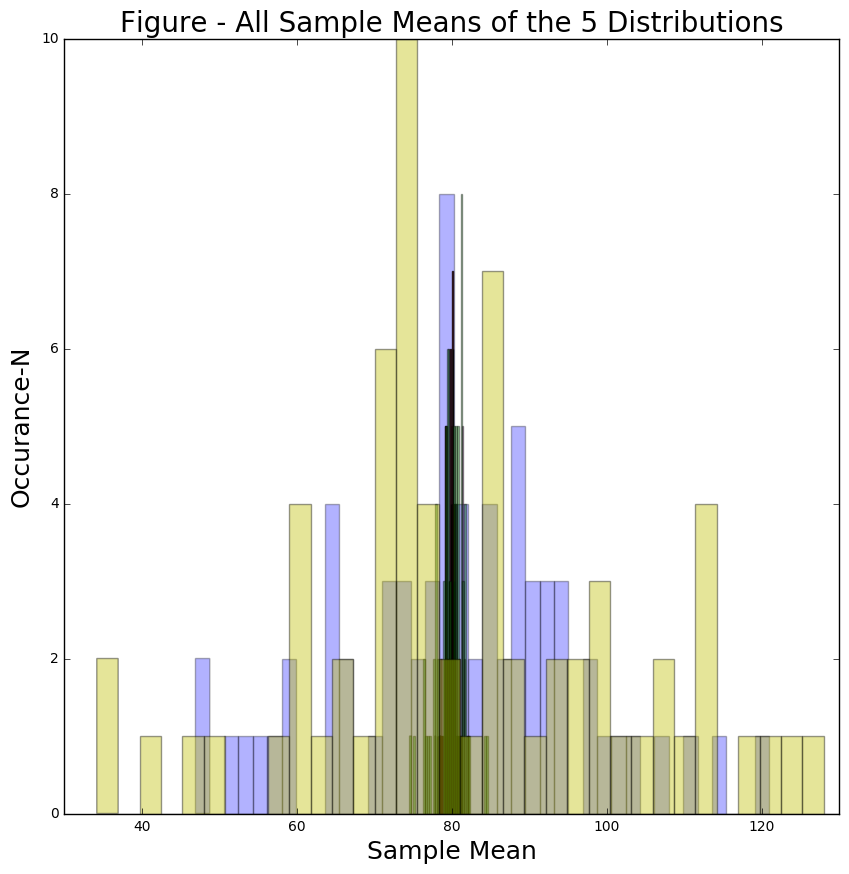

In [108]:
# All Distributions

pl.figure(figsize=(10,10)).add_subplot(111)
pl.hist(allmeans_gauss, bins=40, alpha=0.3,color='b')
pl.hist(allmeans_poiss, bins=40, alpha=0.4,color='purple')
pl.hist(allmeans_binom, bins=40, alpha=0.8,color='r')
pl.hist(allmeans_chisq, bins=40, alpha=0.4,color='g')
pl.hist(allmeans_logis,bins=40, alpha=0.4,color='y')

pl.xlim(30,130)
pl.ylim(0,10)
pl.title('Figure - All Sample Means of the 5 Distributions', fontsize=20)
pl.xlabel('Sample Mean', fontsize=18)
pl.ylabel('Occurance-N', fontsize=18)



## Extra: Fit the histogram with a gaussian

In [109]:
for d in myd:
    print(d)

binom
poiss
chisq
gauss
logis


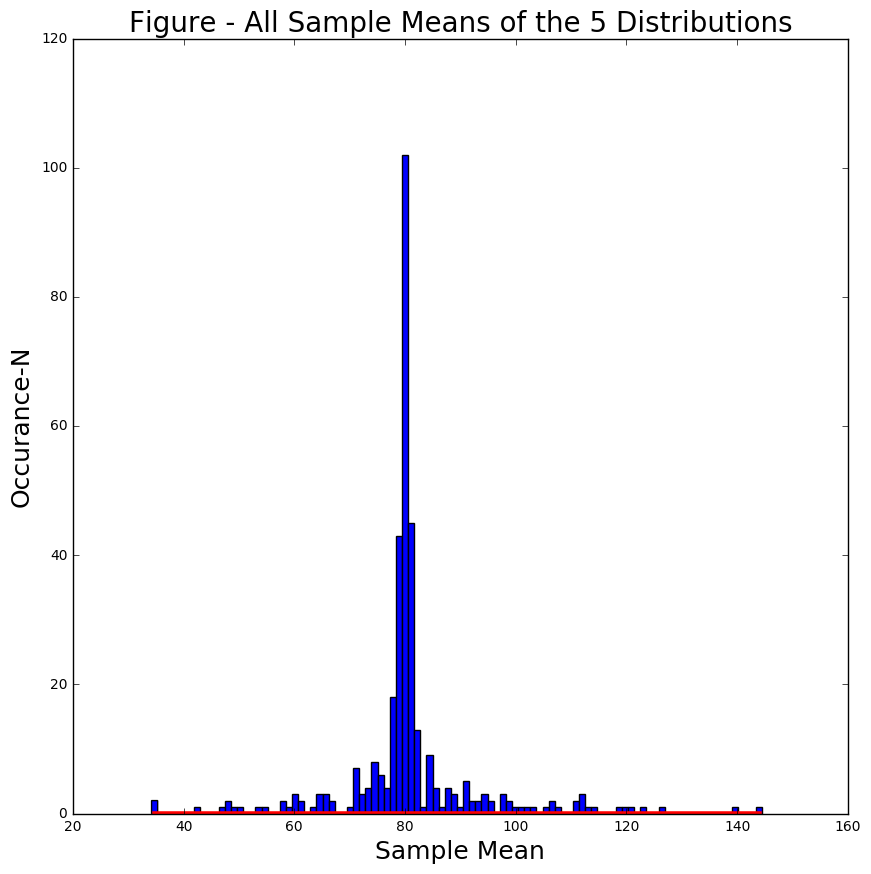

In [122]:
# All Distributions
'''
pl.figure(figsize=(10,10)).add_subplot(111)
pl.hist(allmeans_gauss, bins=40, alpha=0.3,color='b')
pl.hist(allmeans_poiss, bins=40, alpha=0.4,color='purple')
pl.hist(allmeans_binom, bins=40, alpha=0.8,color='r')
pl.hist(allmeans_chisq, bins=40, alpha=0.4,color='g')
pl.hist(allmeans_logis,bins=40, alpha=0.4,color='y')
'''
allmeans = []
for mean in allmeans_gauss:
    allmeans.append(mean)
for mean in allmeans_poiss:
    allmeans.append(mean)
for mean in allmeans_binom:
    allmeans.append(mean)
for mean in allmeans_chisq:
    allmeans.append(mean)
for mean in allmeans_logis:
    allmeans.append(mean)

pl.figure(figsize=(10,10)).add_subplot(111)

# Source: http://stackoverflow.com/questions/17779316/un-normalized-gaussian-curve-on-histogram
#pl.hist(allmeans, bins=100)
data = pl.hist(allmeans, bins=100, normed=0)

# Equation for Gaussian
def f(x, a, b, c):
    return a * pl.exp(-(x - b)**2.0 / (2 * c**2))

# Generate data from bins as a set of points 
x = [0.5 * (data[1][i] + data[1][i+1]) for i in xrange(len(data[1])-1)]
y = data[0]

popt, pcov = curve_fit(f, x, y)

x_fit = pl.linspace(x[0], x[-1], 500)
y_fit = f(x_fit, *popt)

plot(x_fit, y_fit, lw=4, color="r")


#pl.xlim(30,130)
#pl.ylim(0,10)
pl.title('Figure - All Sample Means of the 5 Distributions', fontsize=20)
pl.xlabel('Sample Mean', fontsize=18)
pl.ylabel('Occurance-N', fontsize=18)


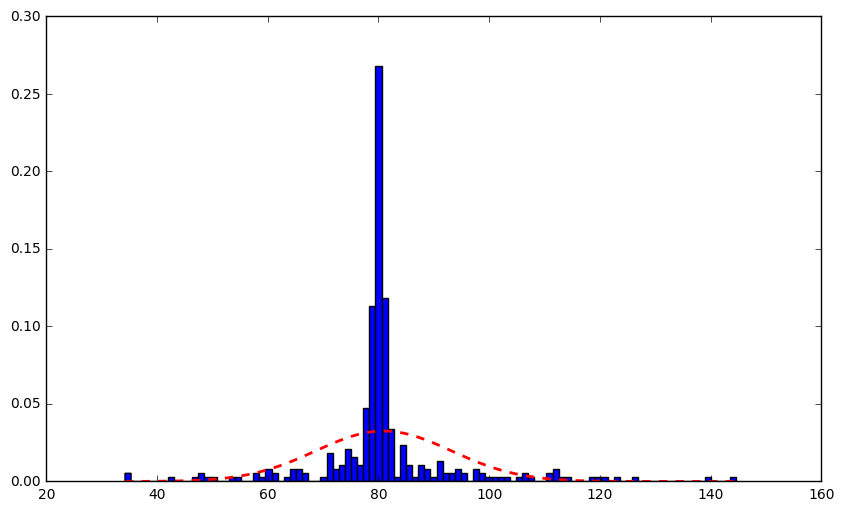

In [121]:
# Method2
# Source: http://www.bdnyc.org/2012/05/fitting-a-gaussian-to-your-data/

import matplotlib.mlab as mlab
from scipy.stats import norm

(mu,sigma) = norm.fit(allmeans)
pl.figure(1)
n,bins,patches=pl.hist(allmeans,100,normed=1,facecolor='blue',align='mid')
y = mlab.normpdf(bins,mu,sigma)
pl.plot(bins,y,'r--',linewidth=2)

In [ ]:
'''
mean = np.mean(allmeans)
print (mean)
var = np.var(allmeans)
sigma = np.sqrt(var)
x = np.linspace(min(allmeans), max(allmeans),500)
pl.plot(x,mlab.normpdf(x,mean,sigma))
'''